# **1. Installing Dependencies**

In [ ]:
!pip install ultralytics -q

## 1.1 Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# **2. Getting Our Dataset**

In [ ]:
%cd /content/gdrive/MyDrive/yolov7

#### ROBOFLOW DATASET DOWNLOAD CODE #####
from roboflow import Roboflow
rf = Roboflow(api_key="xxxxxxxxxxxxx")
project = rf.workspace("vinitawale").project("drones-uav-yolov5")
dataset = project.version(1).download("yolov8")

# **3. Run YOLOv8 Training**

## 3.1 Start Training



In [ ]:
from ultralytics import YOLO
model =  YOLO()

model.train(data = "/content/drive/MyDrive/DataSet/DroneX/Drones-UAV/data.yaml", epochs = 10)

Ultralytics YOLOv8.0.81 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/DataSet/DroneX/Drones-UAV/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fal

# **4. Evaluation**

## 4.1 F1- Confidence Curve

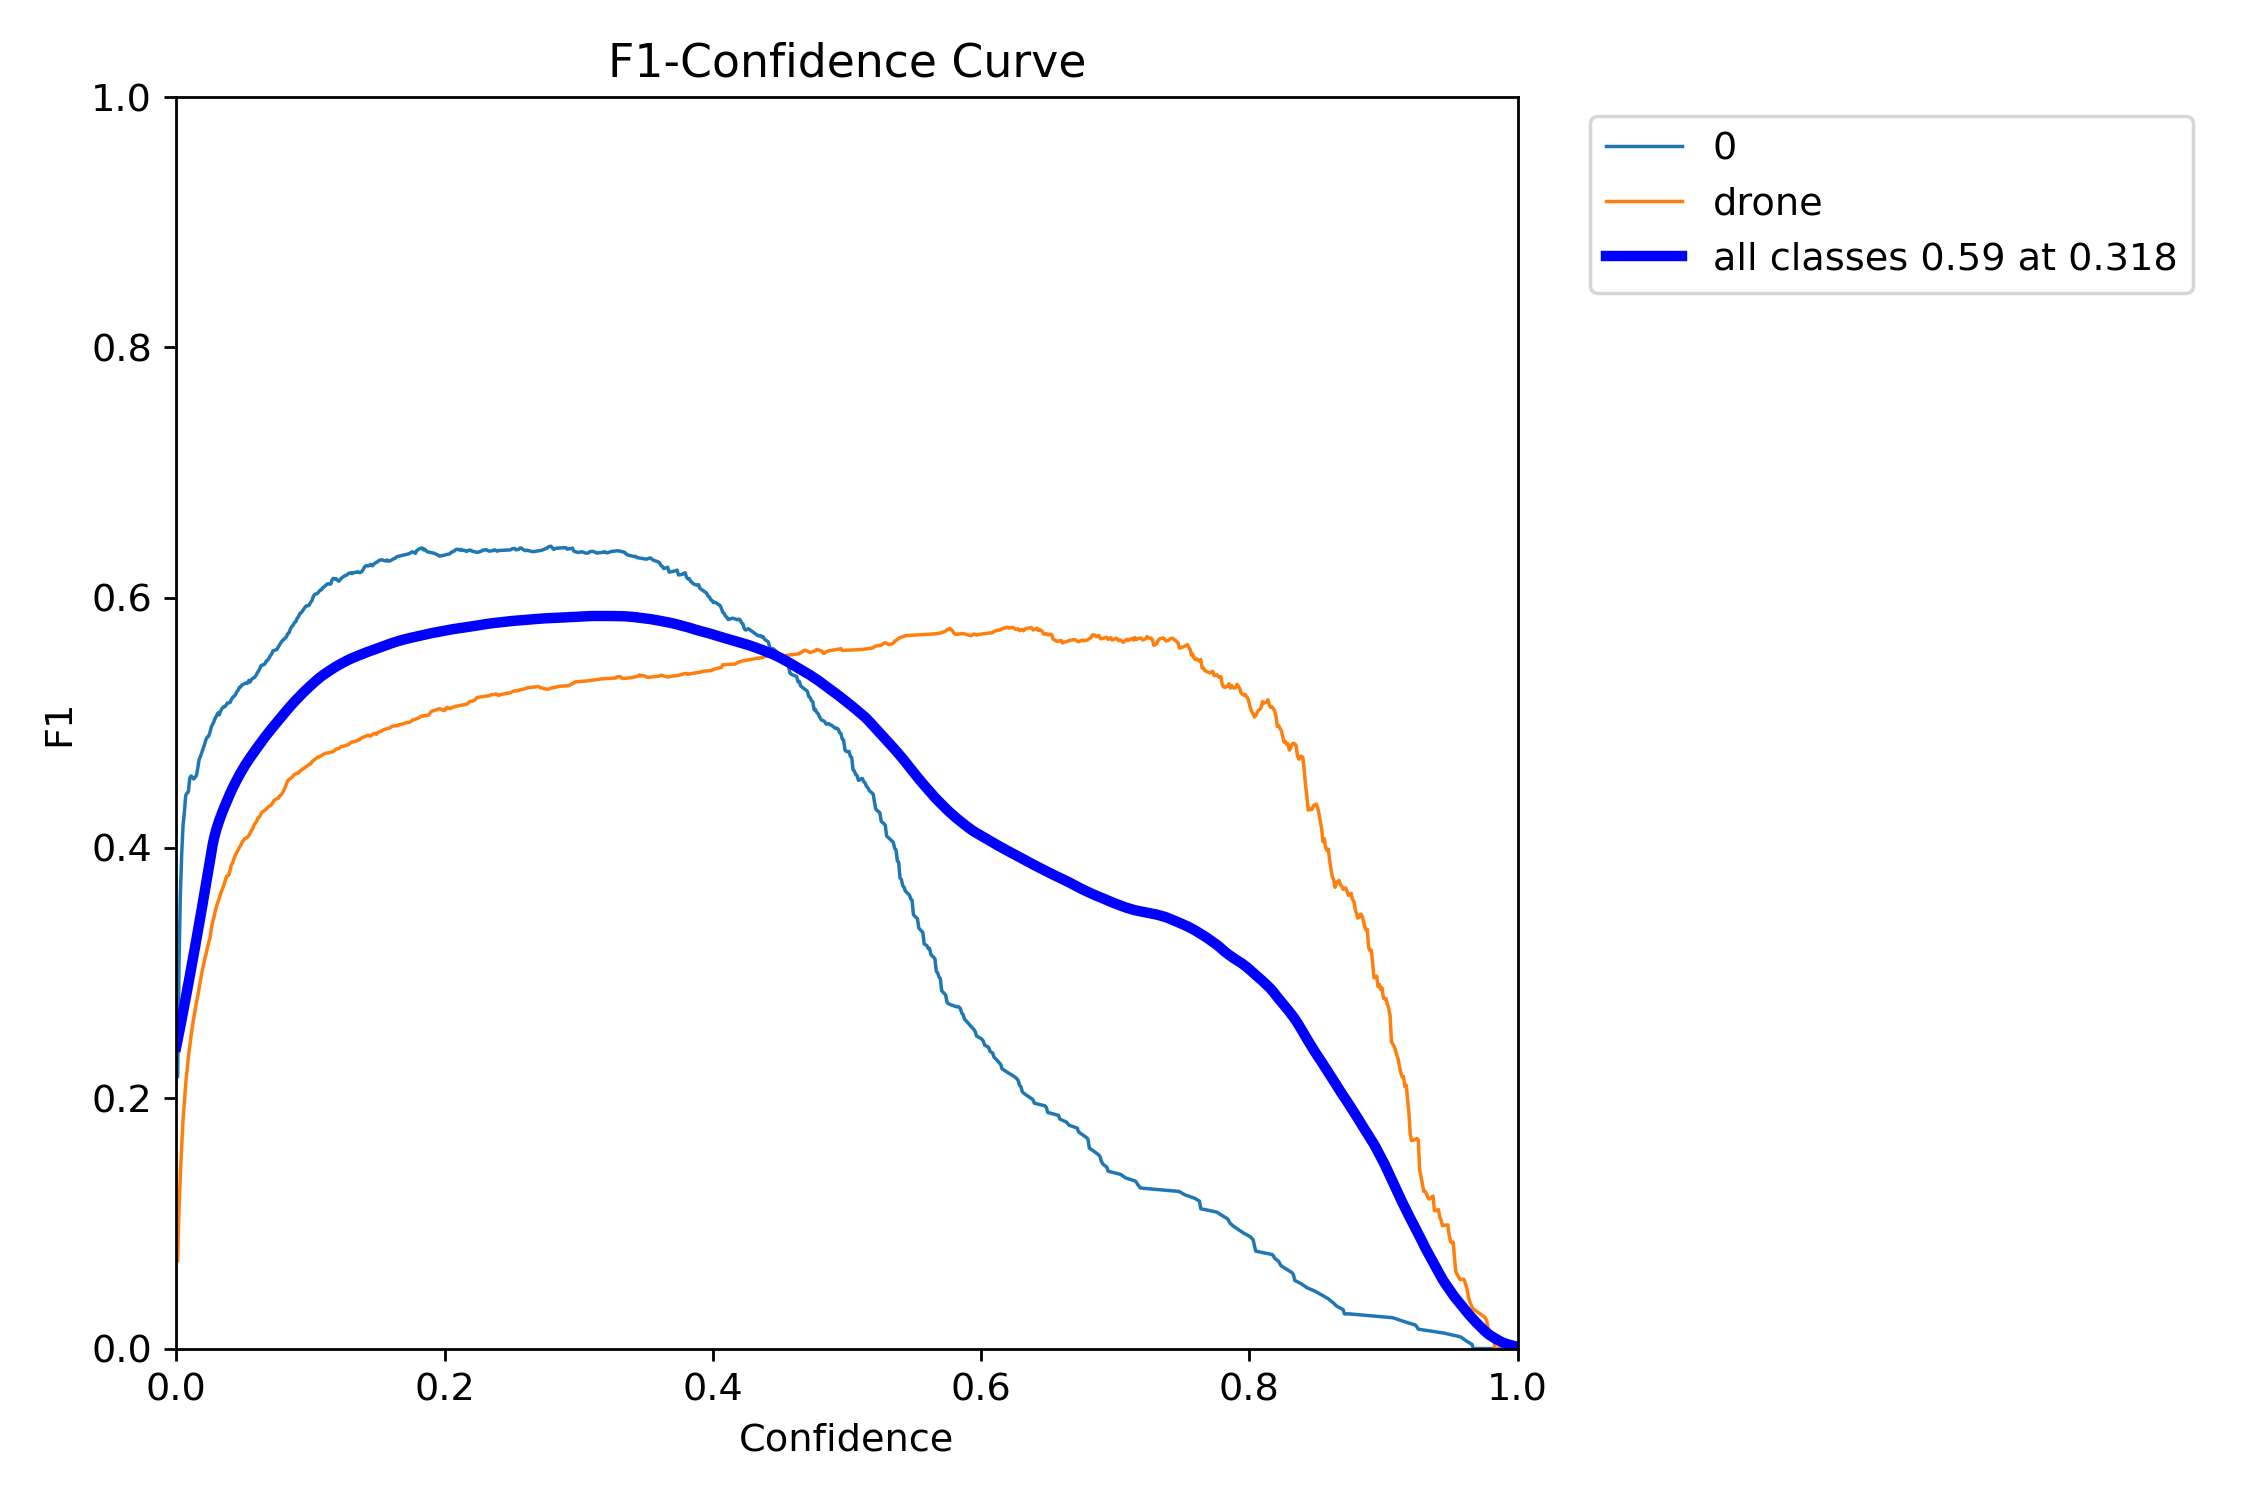

In [ ]:
from IPython.display import Image
display(Image("/content/runs/detect/train2/F1_curve.png", width=1000, height=600))

## 4.2 Precision-Recall Curve

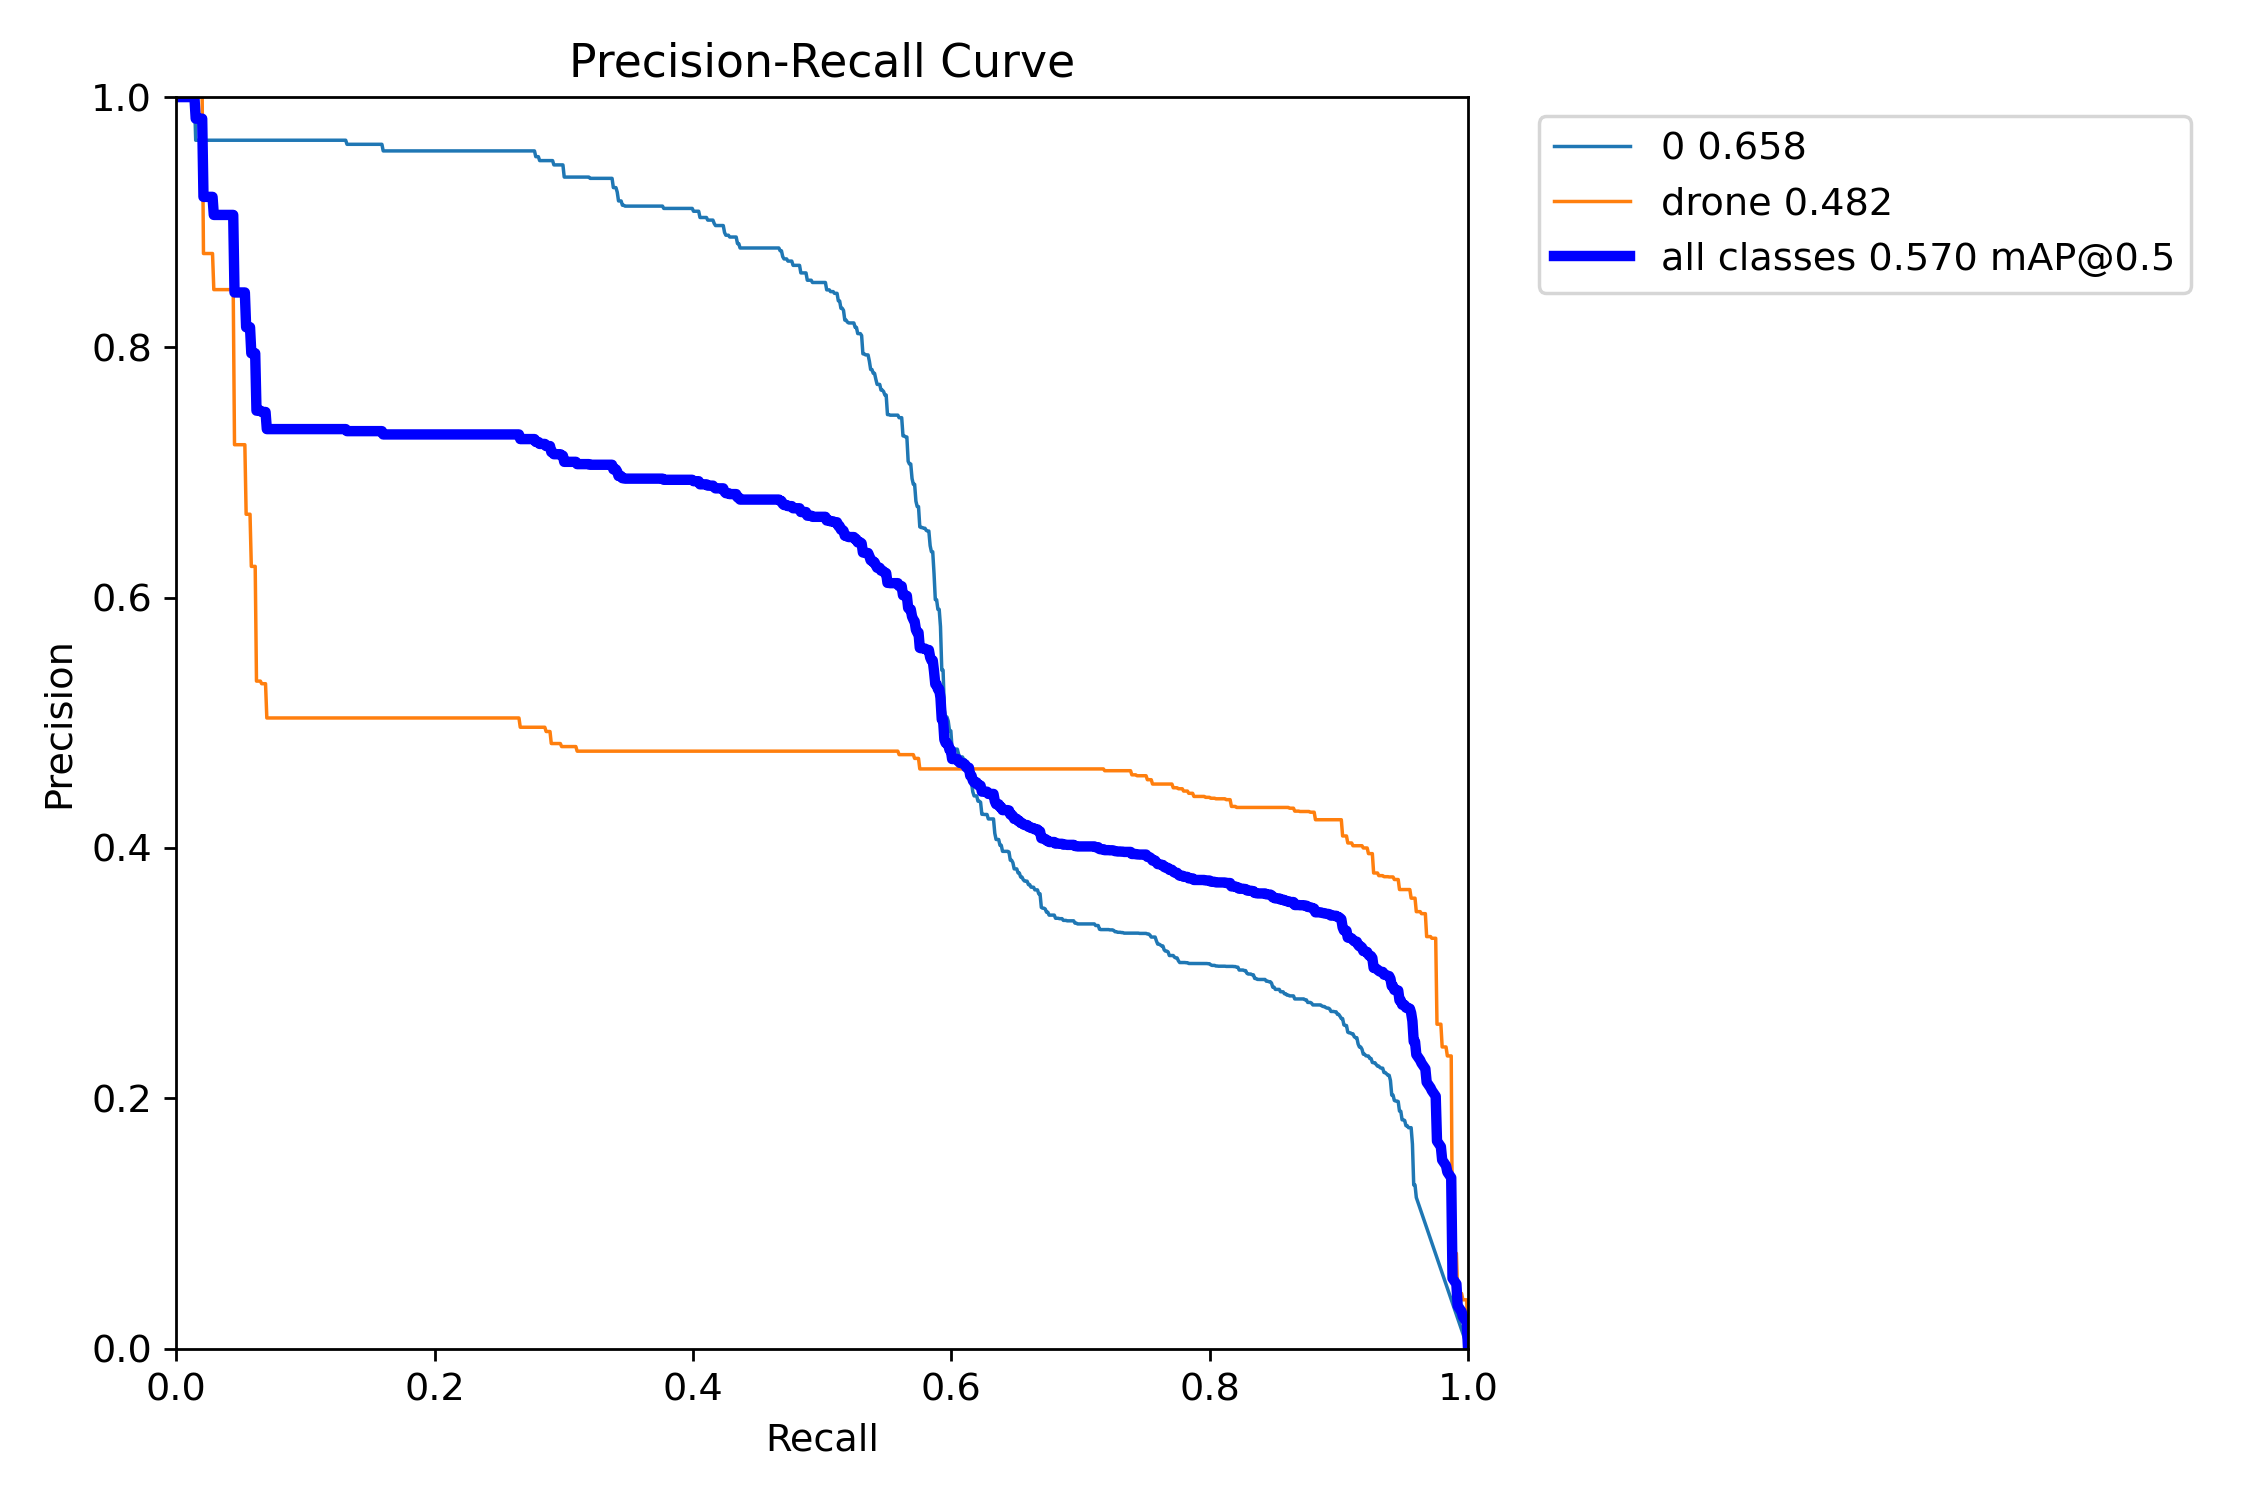

In [ ]:
display(Image("/content/runs/detect/train2/PR_curve.png", width=1000, height=600))

## 4.3 Precision-Confidence Curve

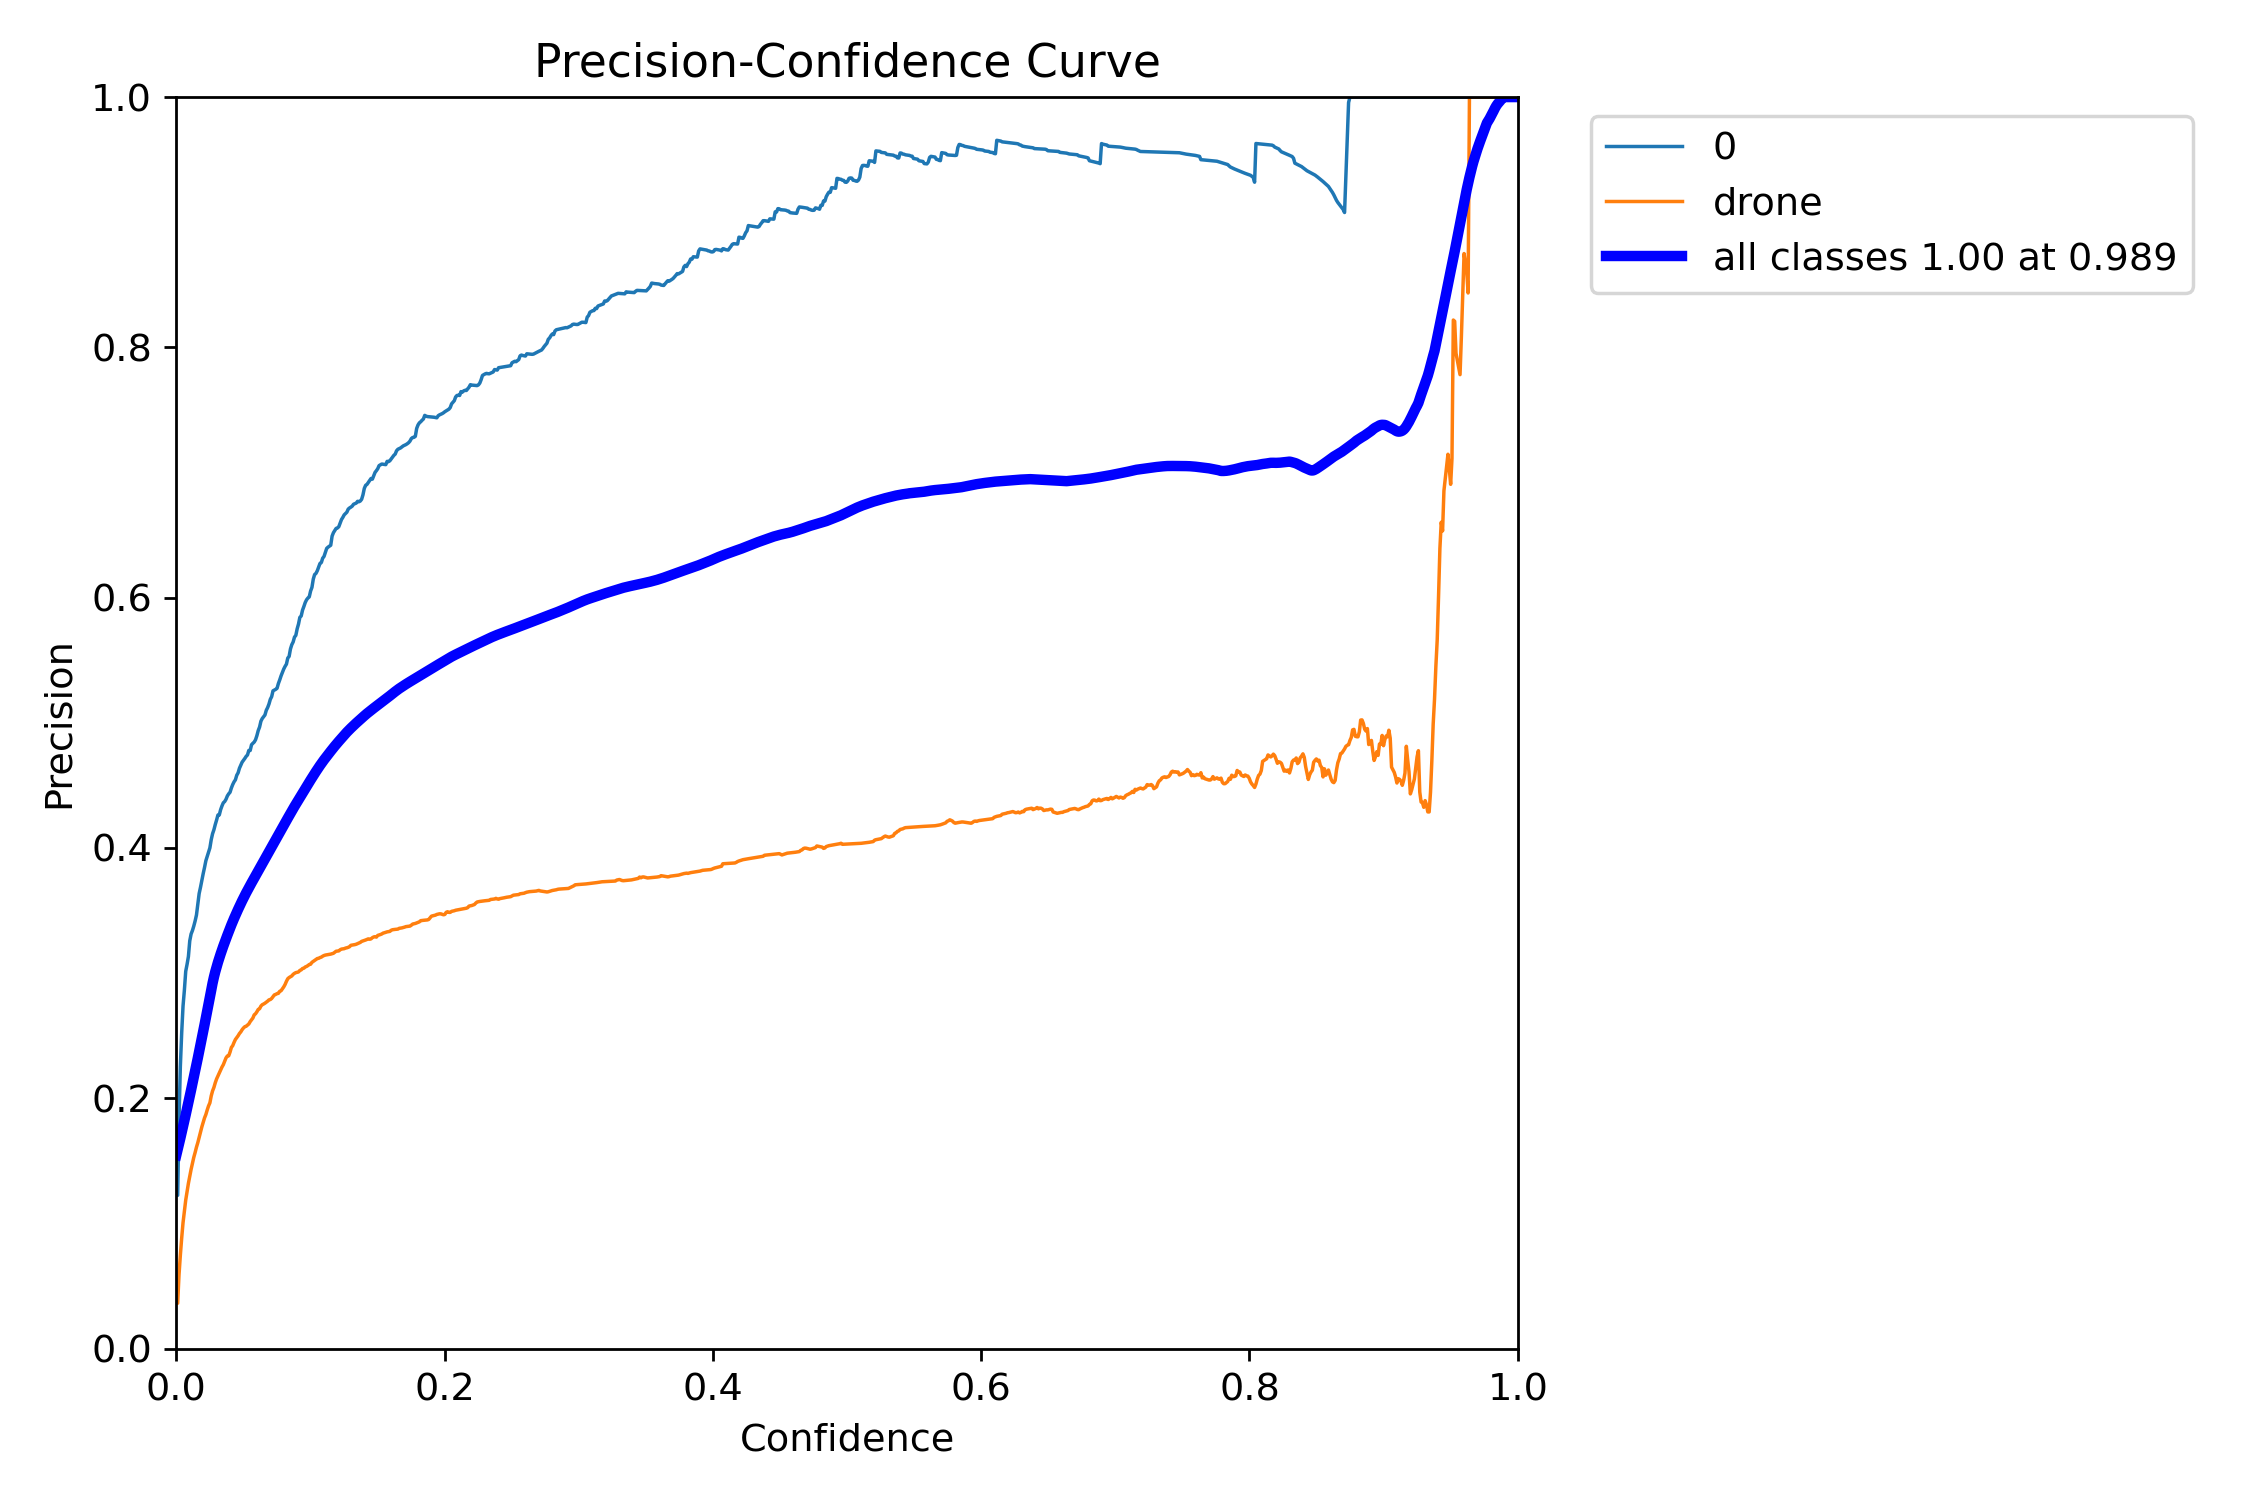

In [ ]:
display(Image("/content/runs/detect/train2/P_curve.png", width=1000, height=600))

## 4.4 Confusion Matrix

Confusion Matrix:


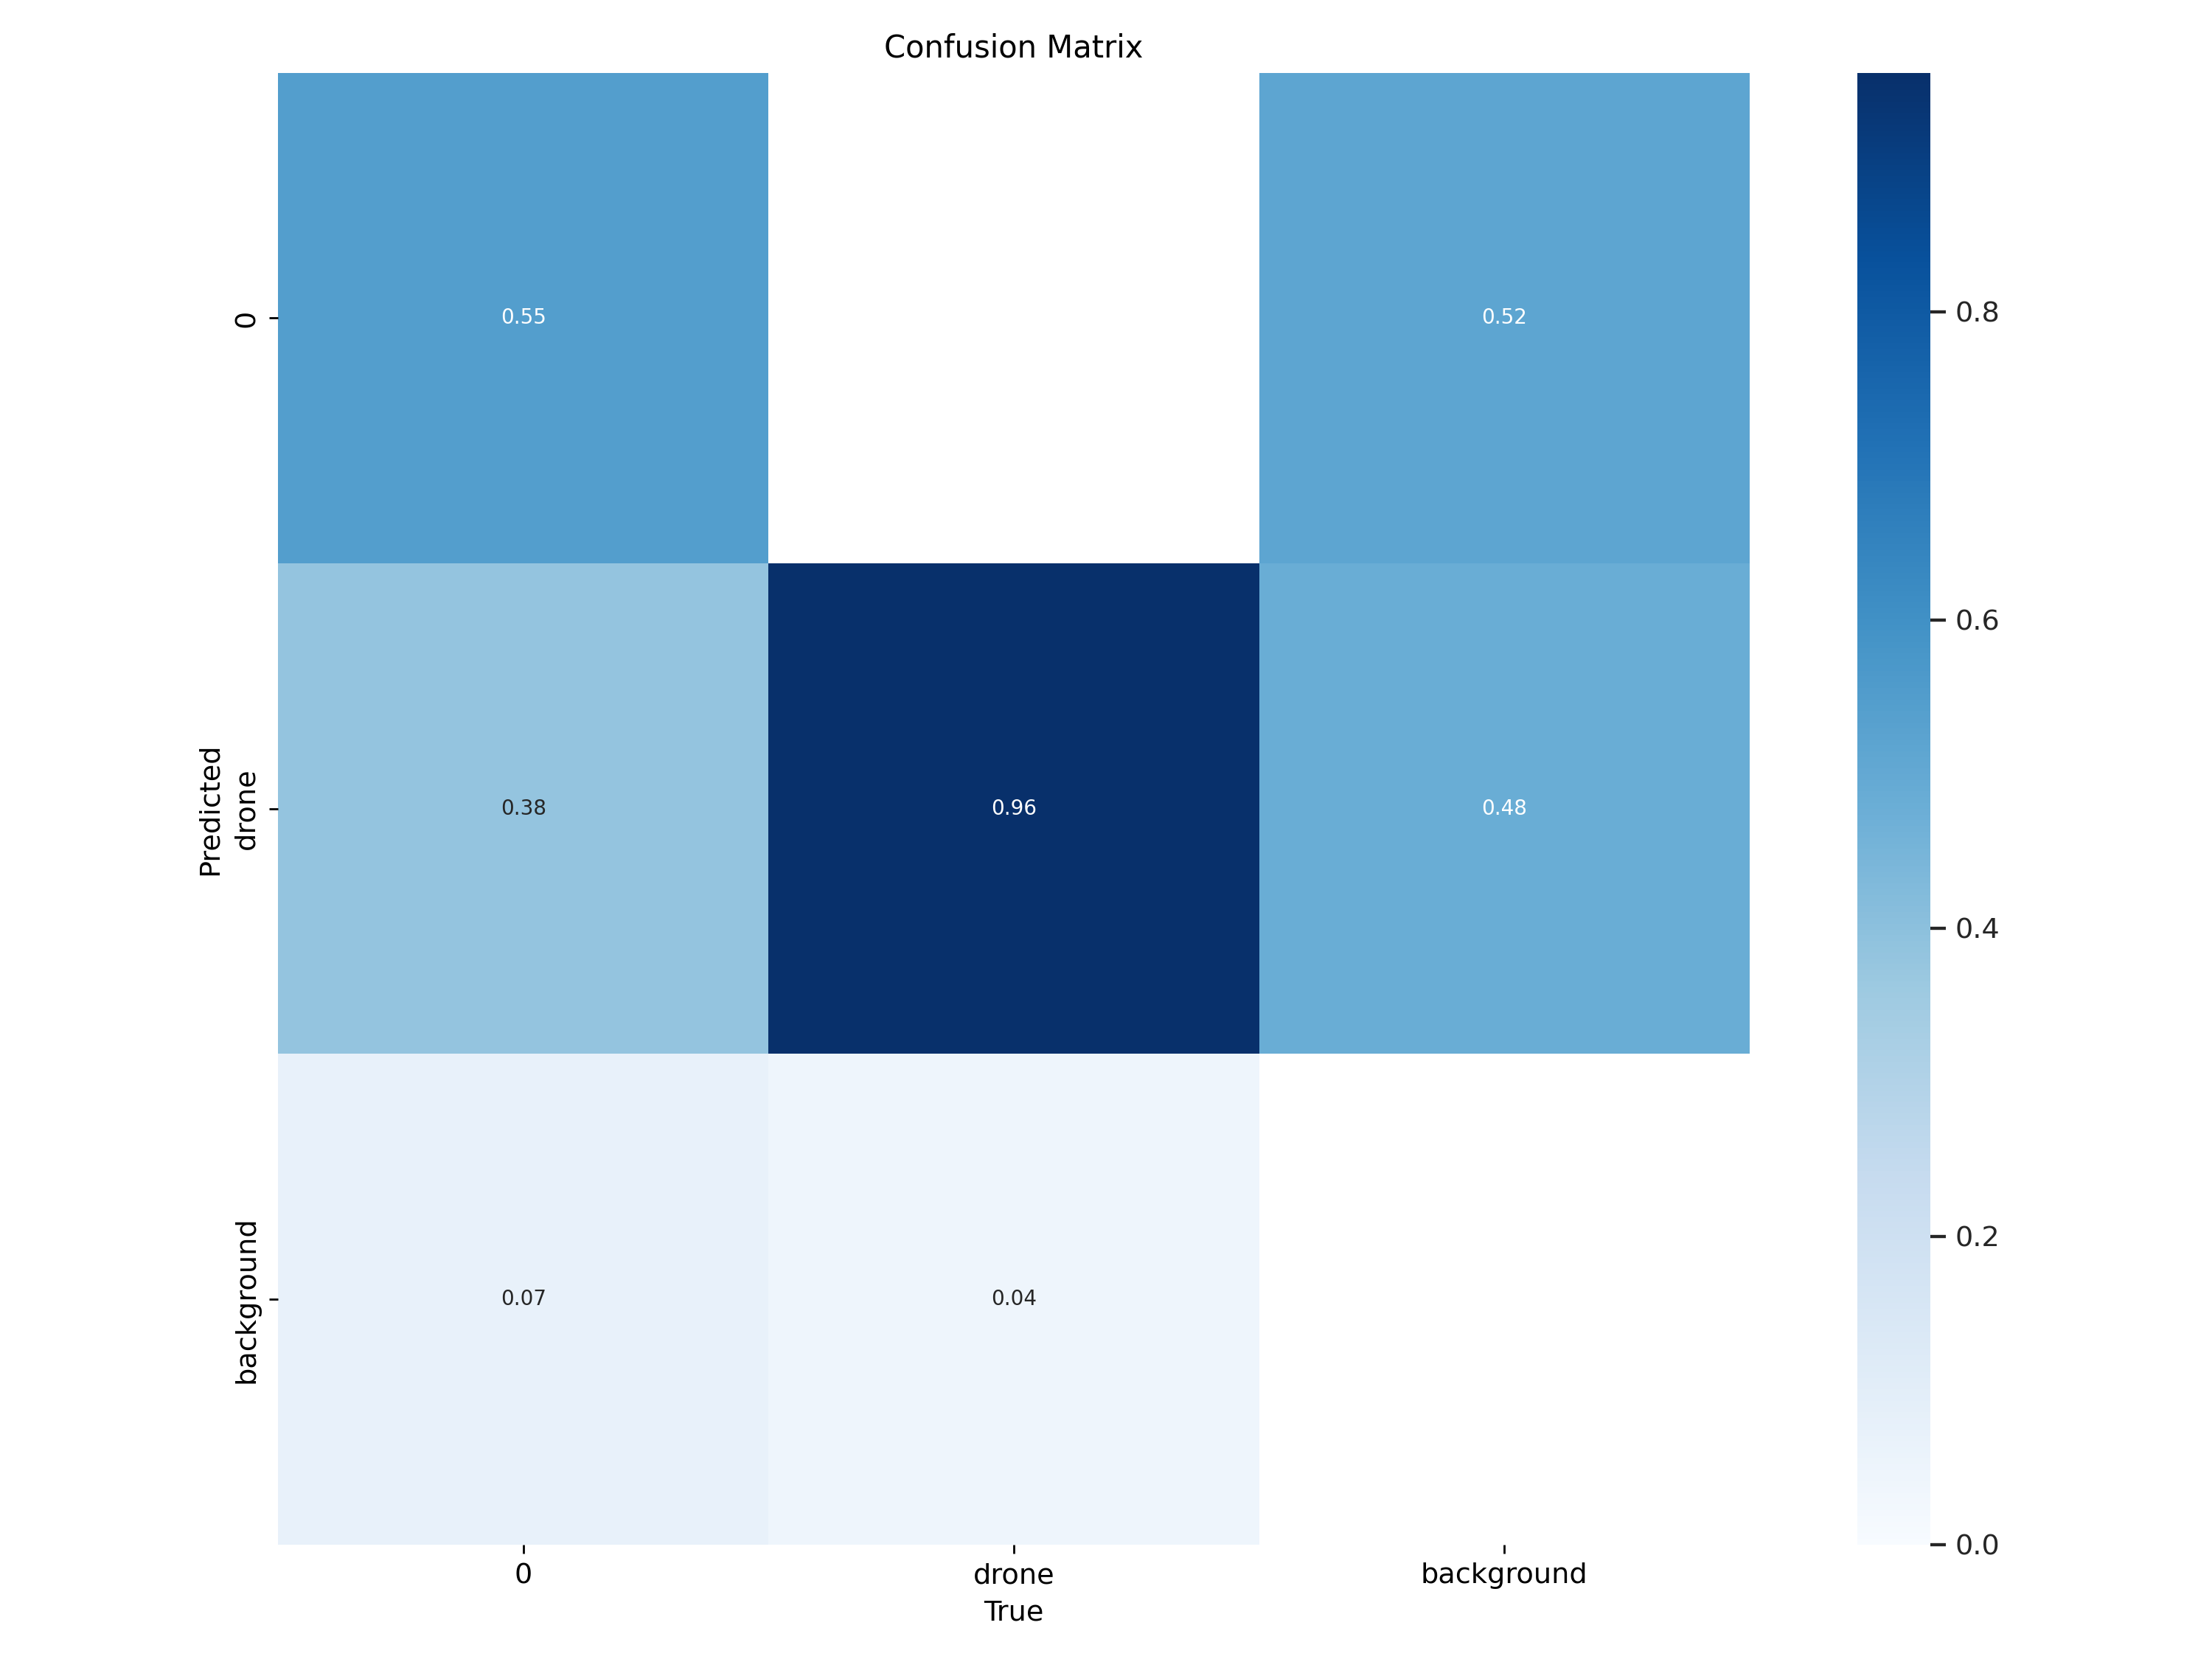

In [ ]:
print("Confusion Matrix:")
display(Image("/content/runs/detect/train2/confusion_matrix.png", width=1000, height=600))

In [ ]:
!yolo task=detect mode= val model = "/content/runs/detect/train2/weights/best.pt" data = "/content/drive/MyDrive/DataSet/DroneX/Drones-UAV/data.yaml"

Ultralytics YOLOv8.0.81 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1kHKHsioHFgCuXag_Ykl7eD3UpXNTfrye/DroneX/Drones-UAV/valid/labels.cache... 1021 images, 238 backgrounds, 0 corrupt: 100% 1021/1021 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 64/64 [00:22<00:00,  2.83it/s]
                   all       1021        885      0.596      0.734      0.572      0.329
                     0       1021        640       0.82      0.522      0.662      0.338
                 drone       1021        245      0.372      0.947      0.483      0.319
Speed: 1.1ms preprocess, 4.3ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

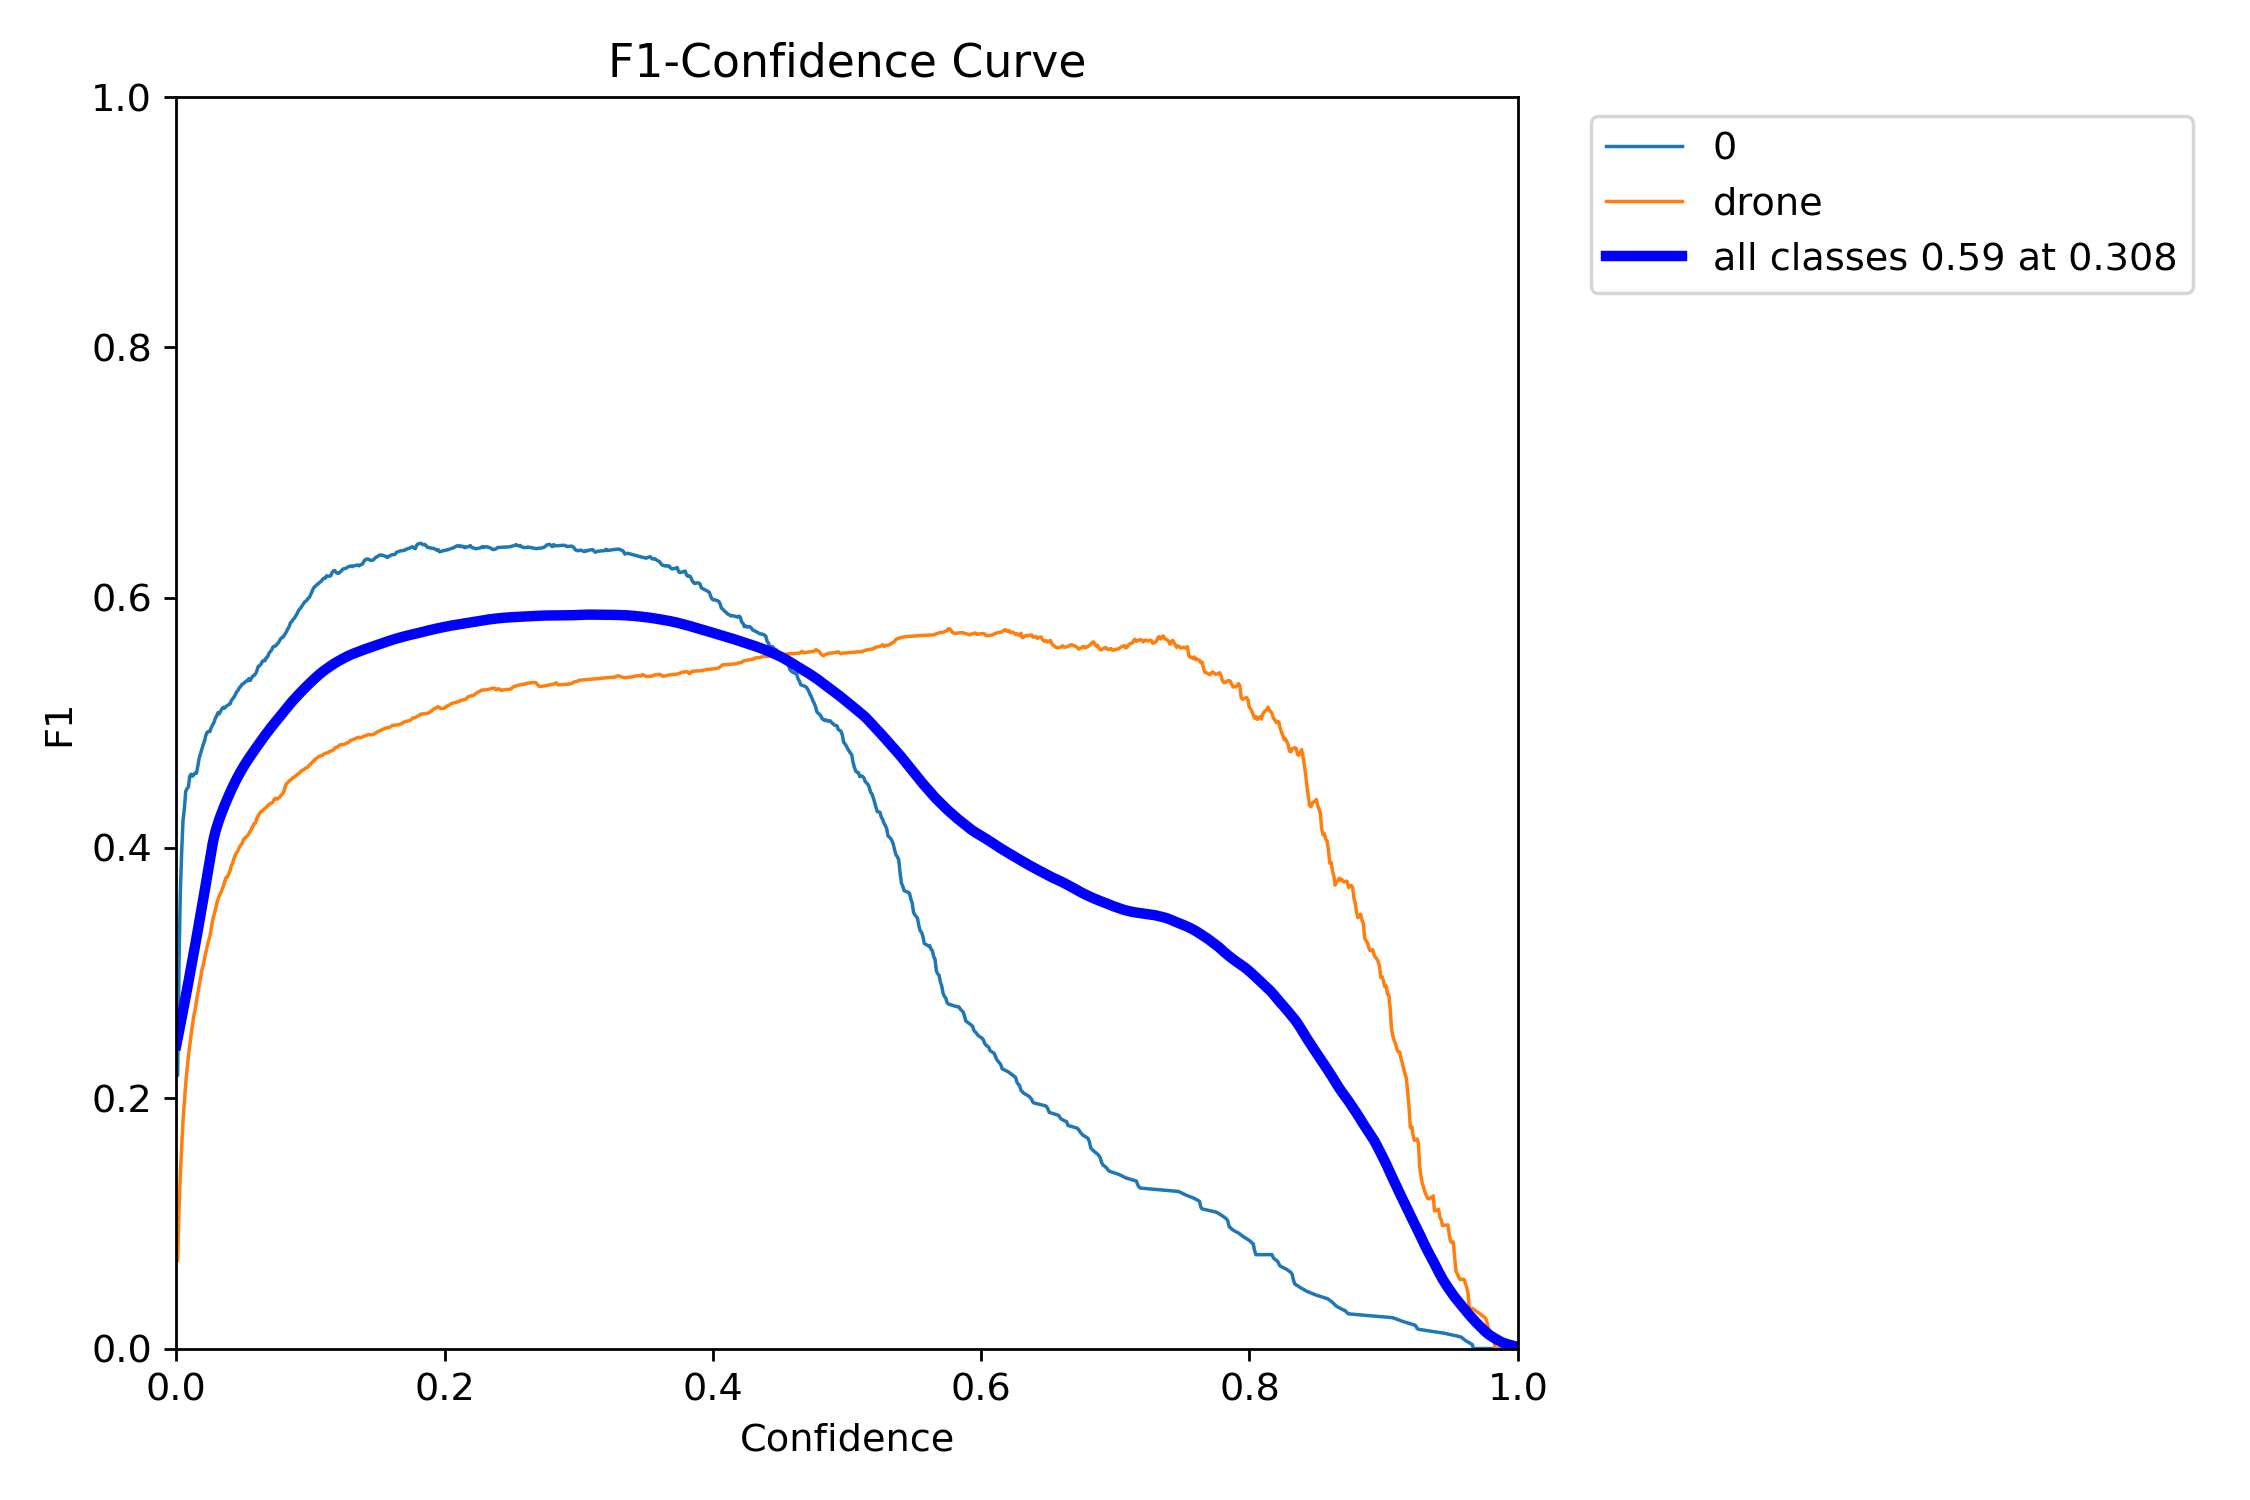

In [ ]:
display(Image("/content/runs/detect/val2/F1_curve.png", width=1000, height=600))

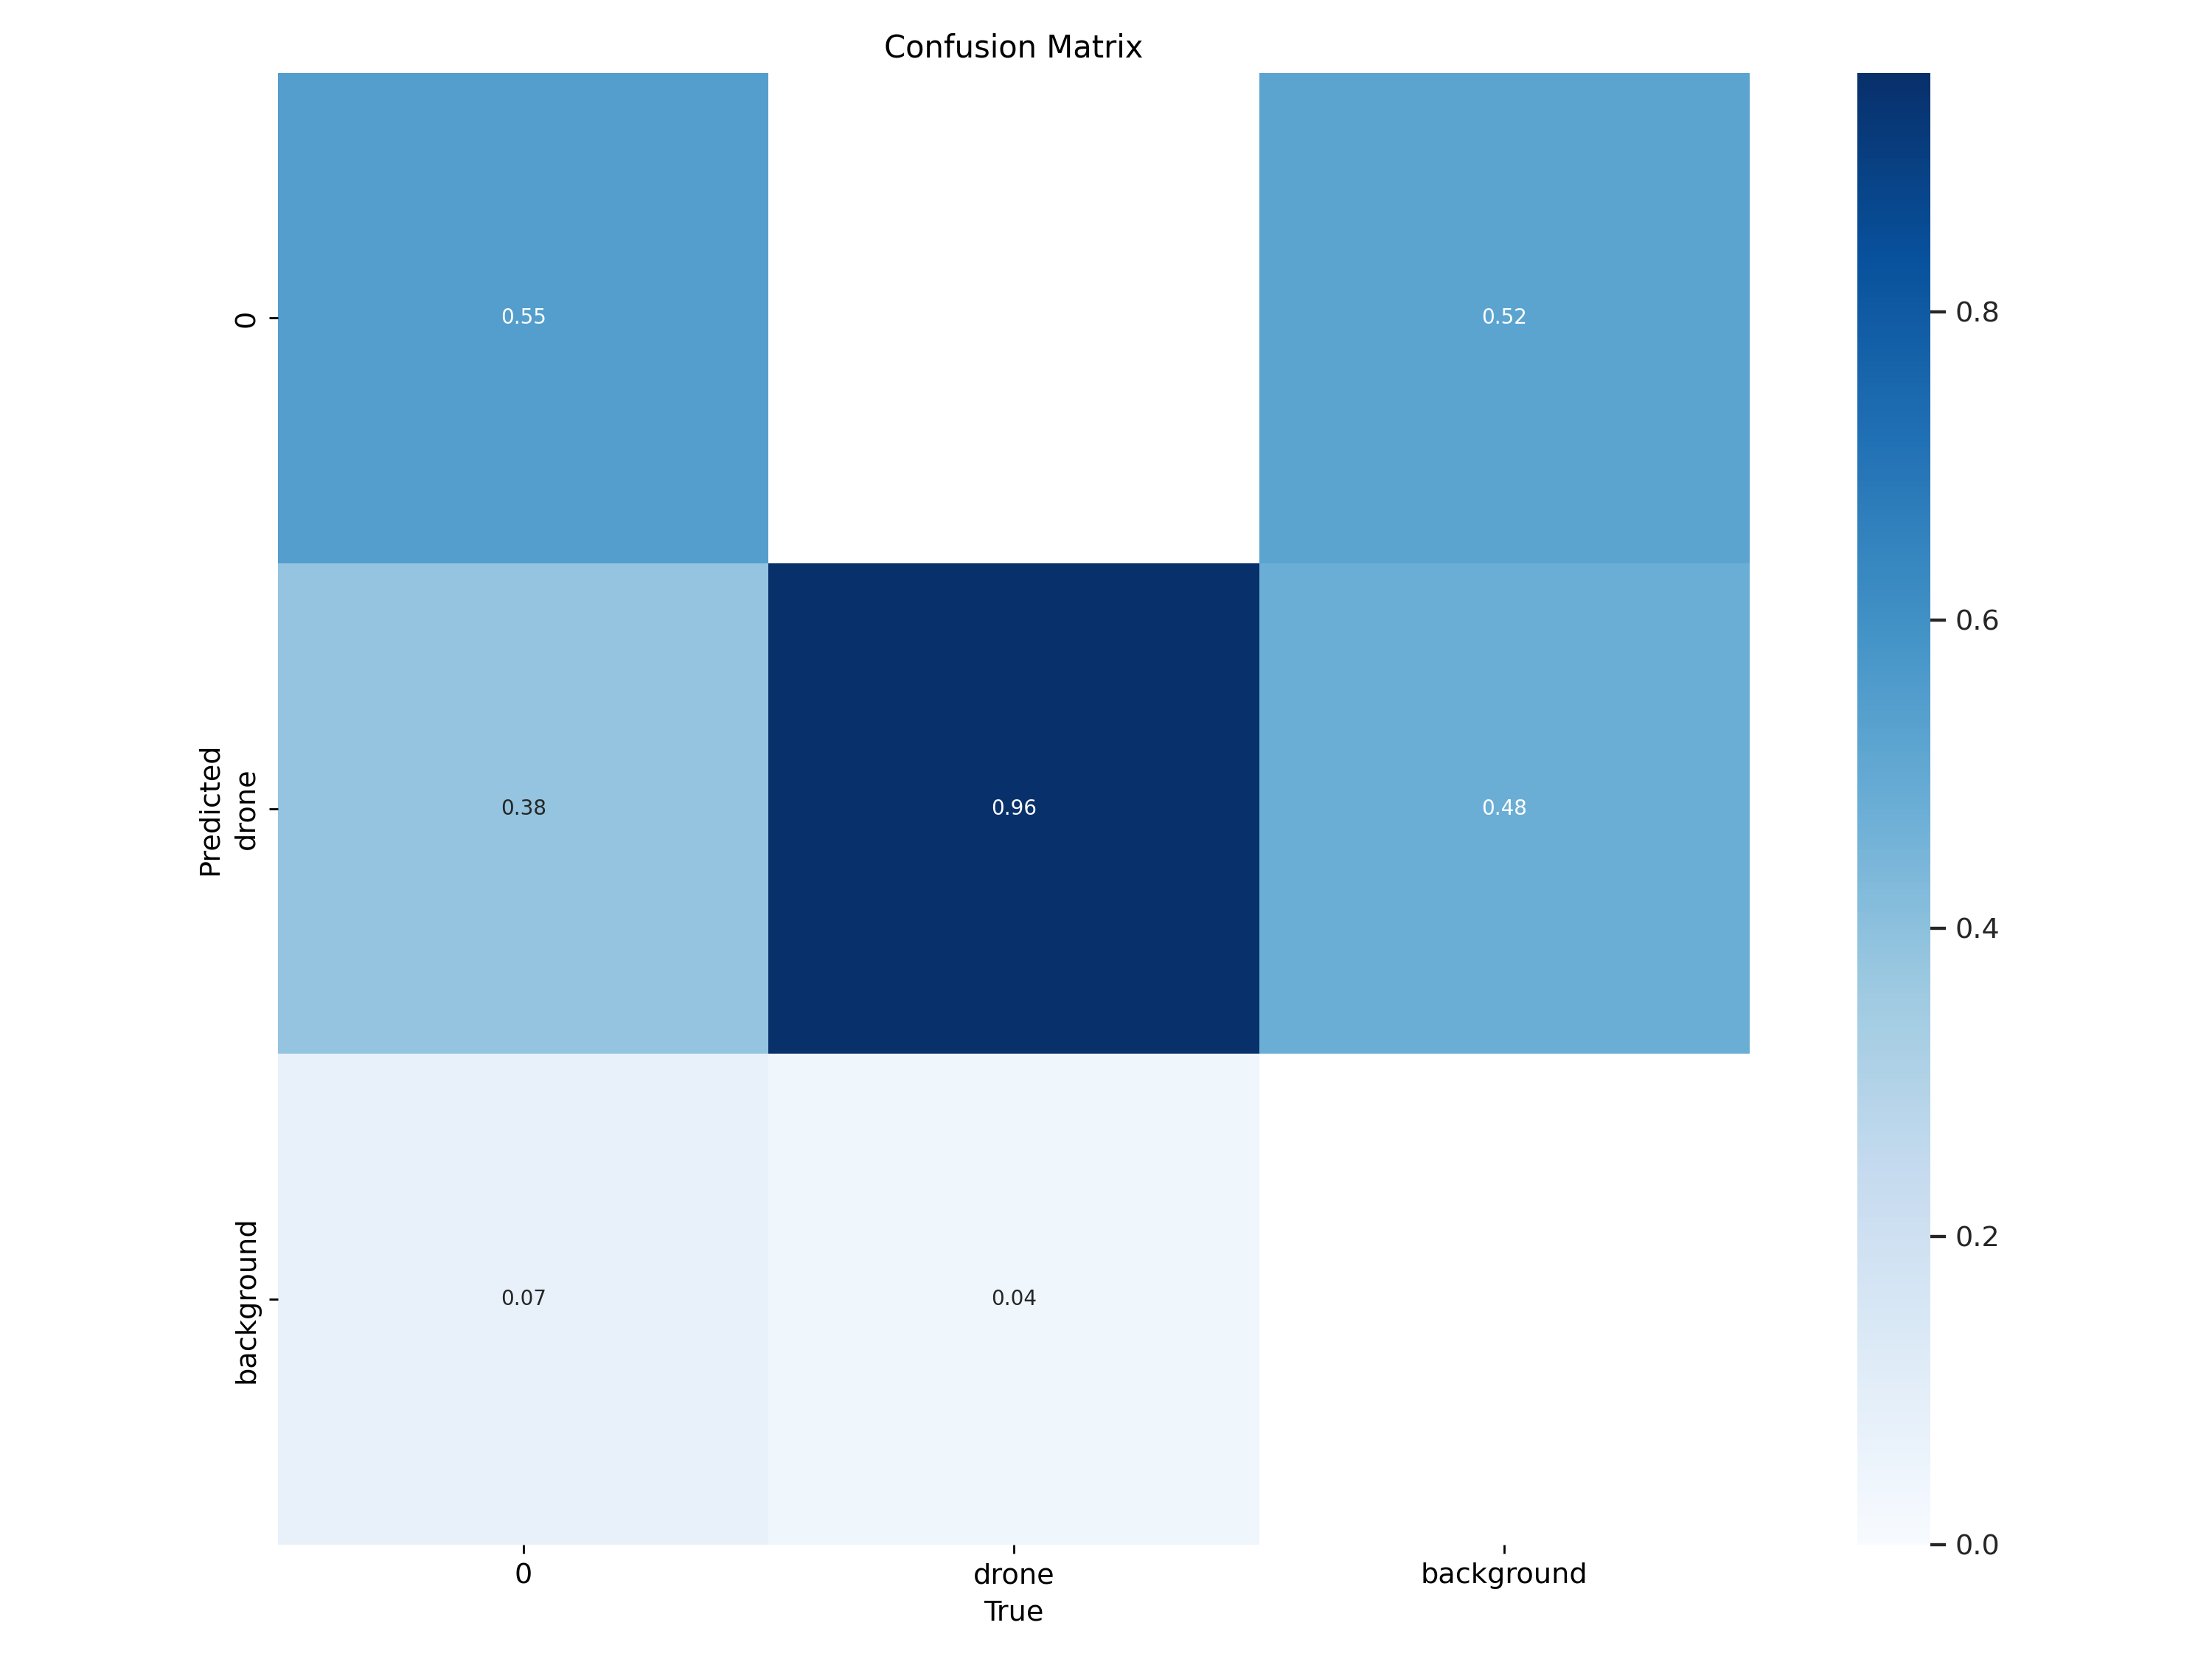

In [ ]:
display(Image("/content/runs/detect/val2/confusion_matrix.png", width=1000, height=600))

# **5. Evaluation on Test Images**

In [ ]:
!yolo task=detect mode= predict model = "/content/runs/detect/train2/weights/best.pt" conf=0.25 source="/content/drive/MyDrive/DataSet/DroneX/Drones-UAV/test/images"

Ultralytics YOLOv8.0.81 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/510 /content/drive/.shortcut-targets-by-id/1kHKHsioHFgCuXag_Ykl7eD3UpXNTfrye/DroneX/Drones-UAV/test/images/127_JPEG.rf.f7e5ca950f248b83d524a0b68b92cbc3.jpg: 384x640 1 drone, 50.3ms
image 2/510 /content/drive/.shortcut-targets-by-id/1kHKHsioHFgCuXag_Ykl7eD3UpXNTfrye/DroneX/Drones-UAV/test/images/130_JPEG.rf.108eca023389e6bff068ccd7d60d640e.jpg: 384x640 2 drones, 9.6ms
image 3/510 /content/drive/.shortcut-targets-by-id/1kHKHsioHFgCuXag_Ykl7eD3UpXNTfrye/DroneX/Drones-UAV/test/images/141_JPEG.rf.cf5570ac7c6d60c00c64121e80ded092.jpg: 384x640 1 drone, 6.3ms
image 4/510 /content/drive/.shortcut-targets-by-id/1kHKHsioHFgCuXag_Ykl7eD3UpXNTfrye/DroneX/Drones-UAV/test/images/144_JPEG.rf.a78f0e59cda979f6ecd748f96a15ec59.jpg: 384x640 1 drone, 6.0ms
image 5/510 /content/drive/.shortcut-targets-by-id/1kHKHsioHFgCuXag_Ykl7eD3UpXNT

## 5.1 Display Inference on Folder of Test Images

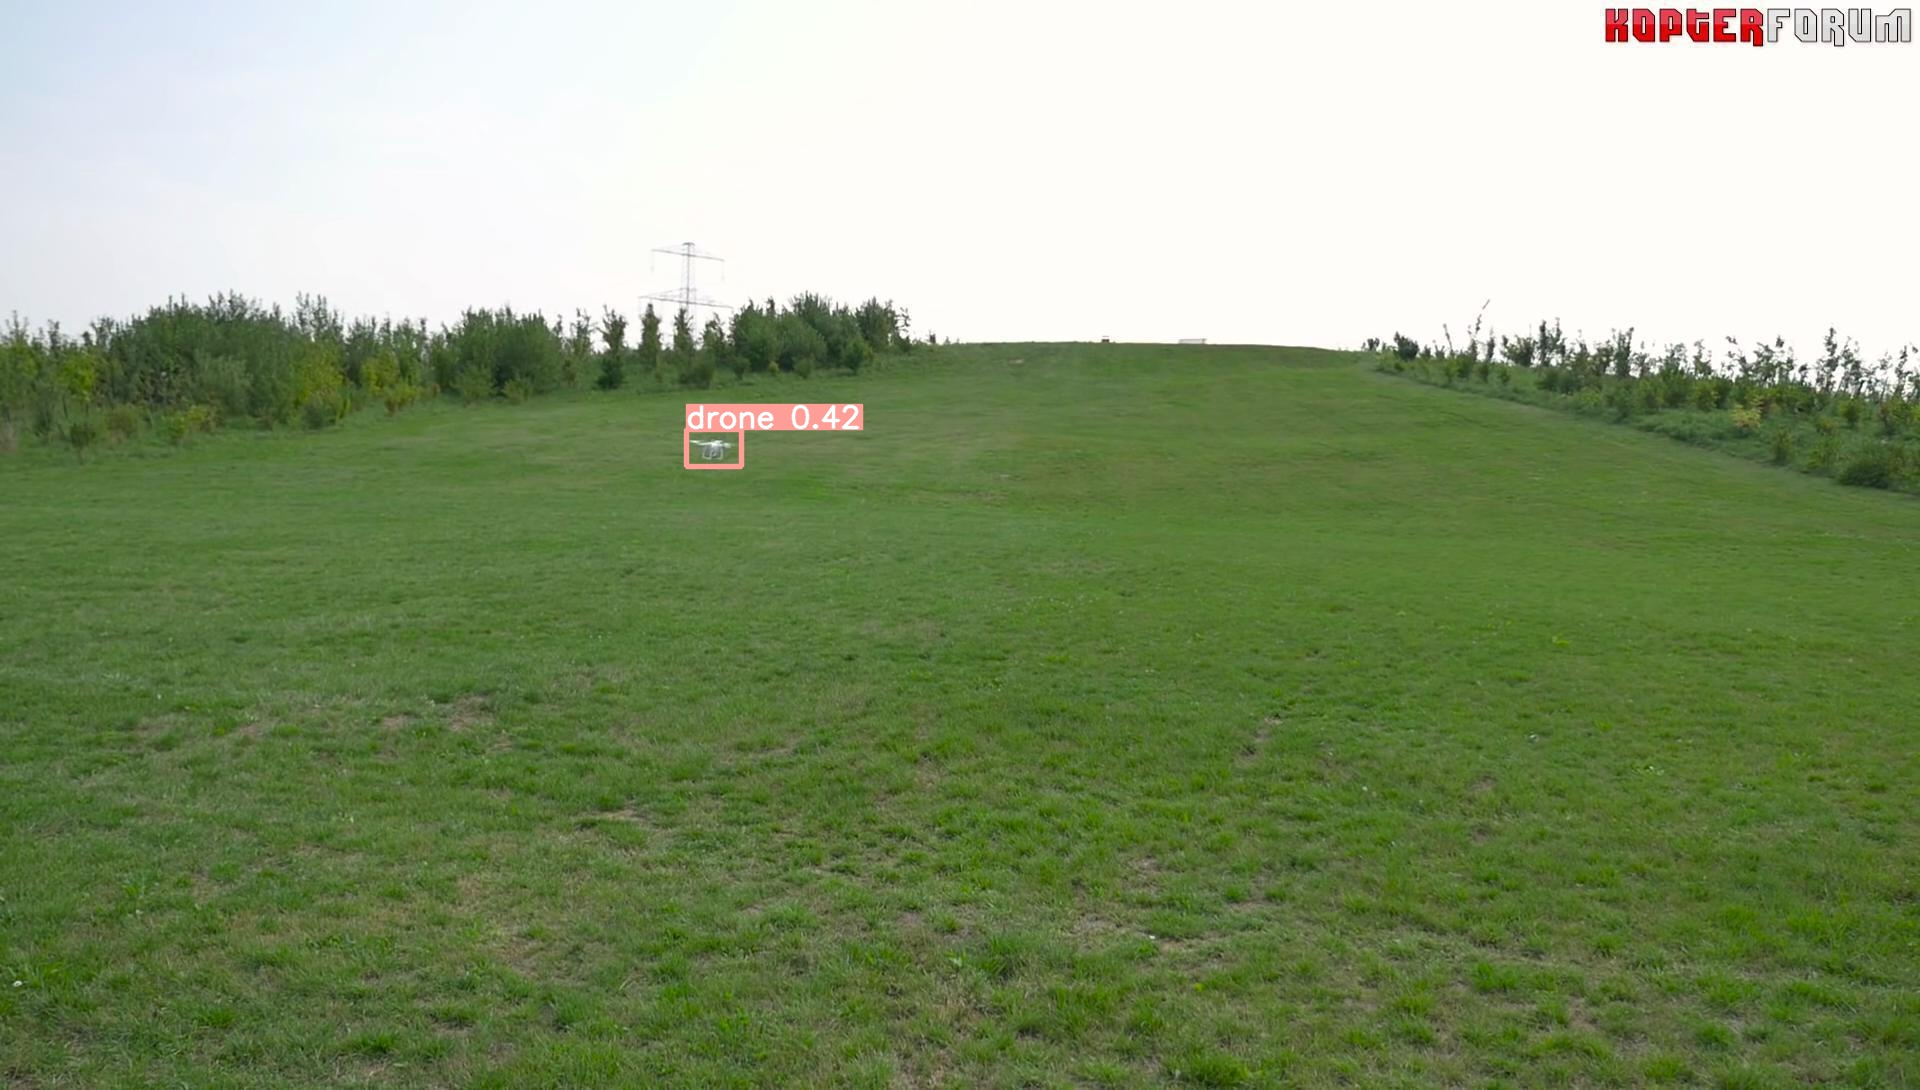

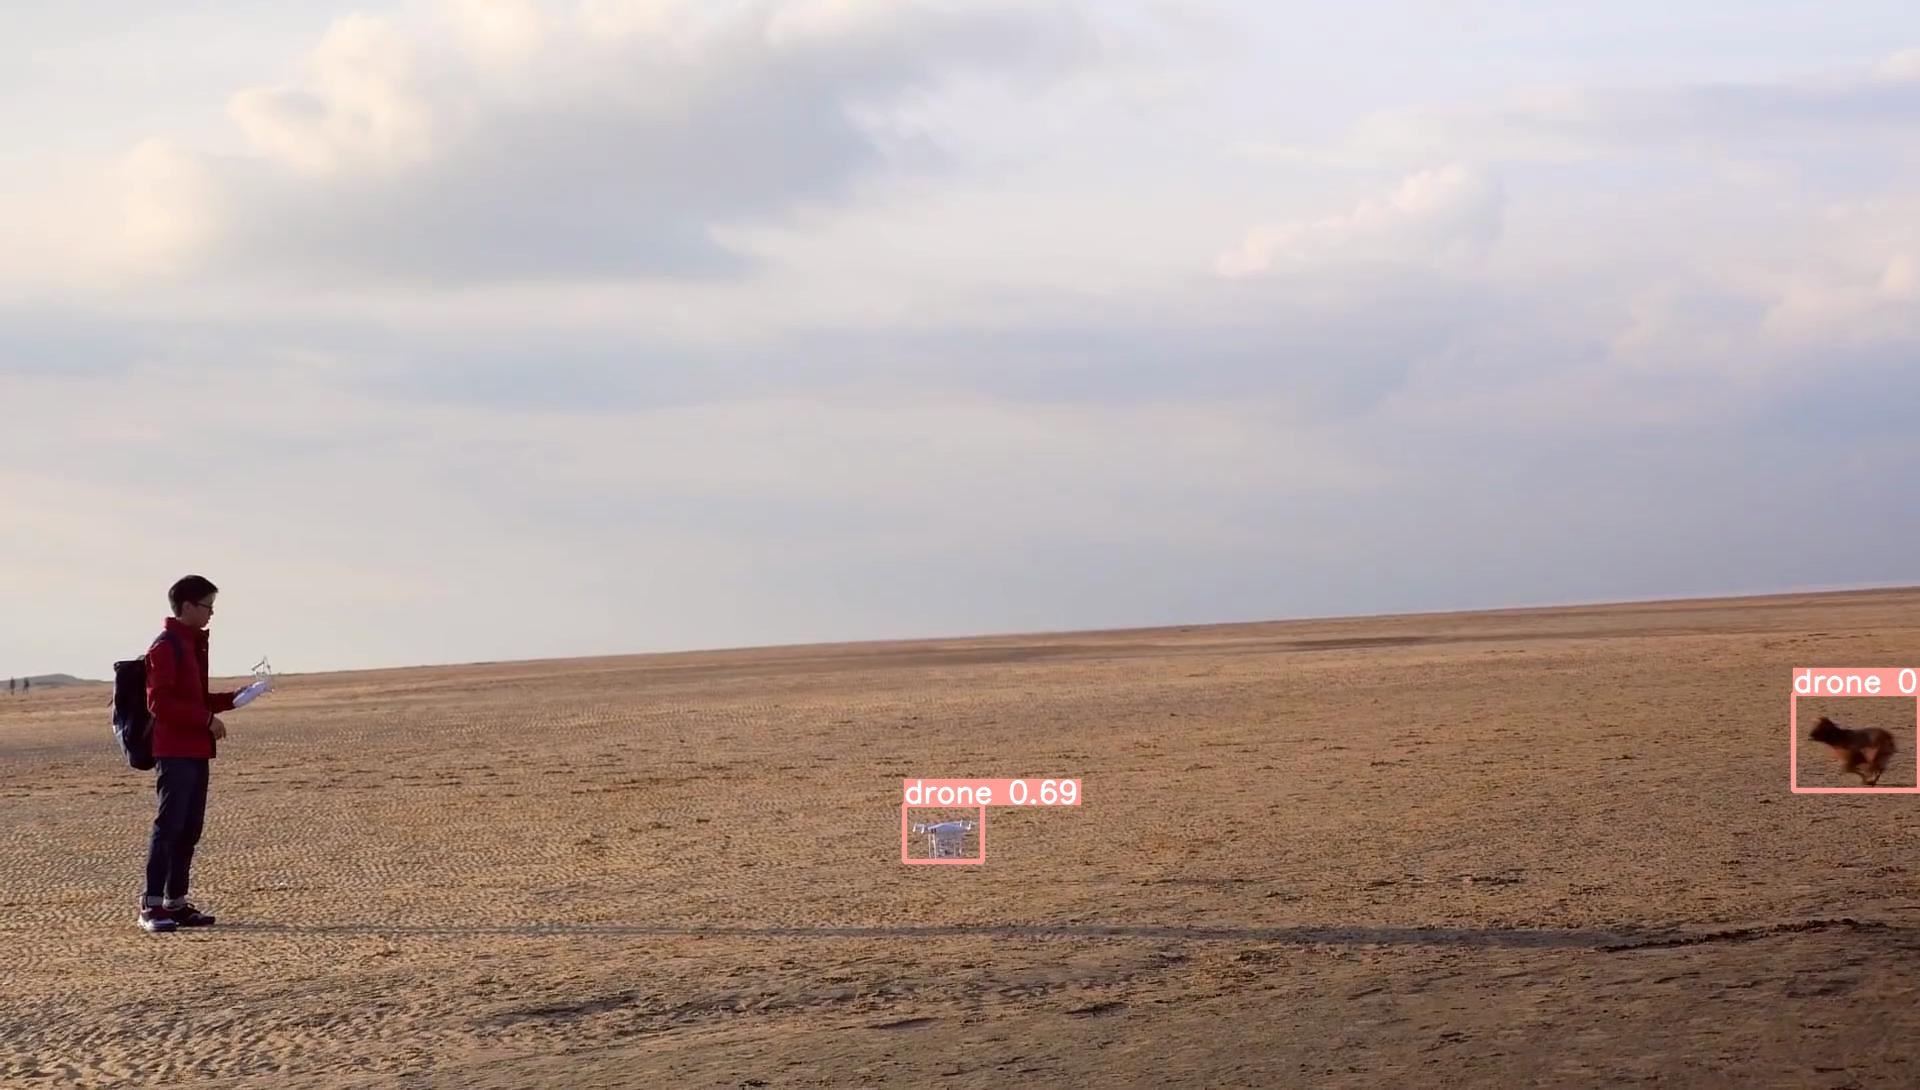

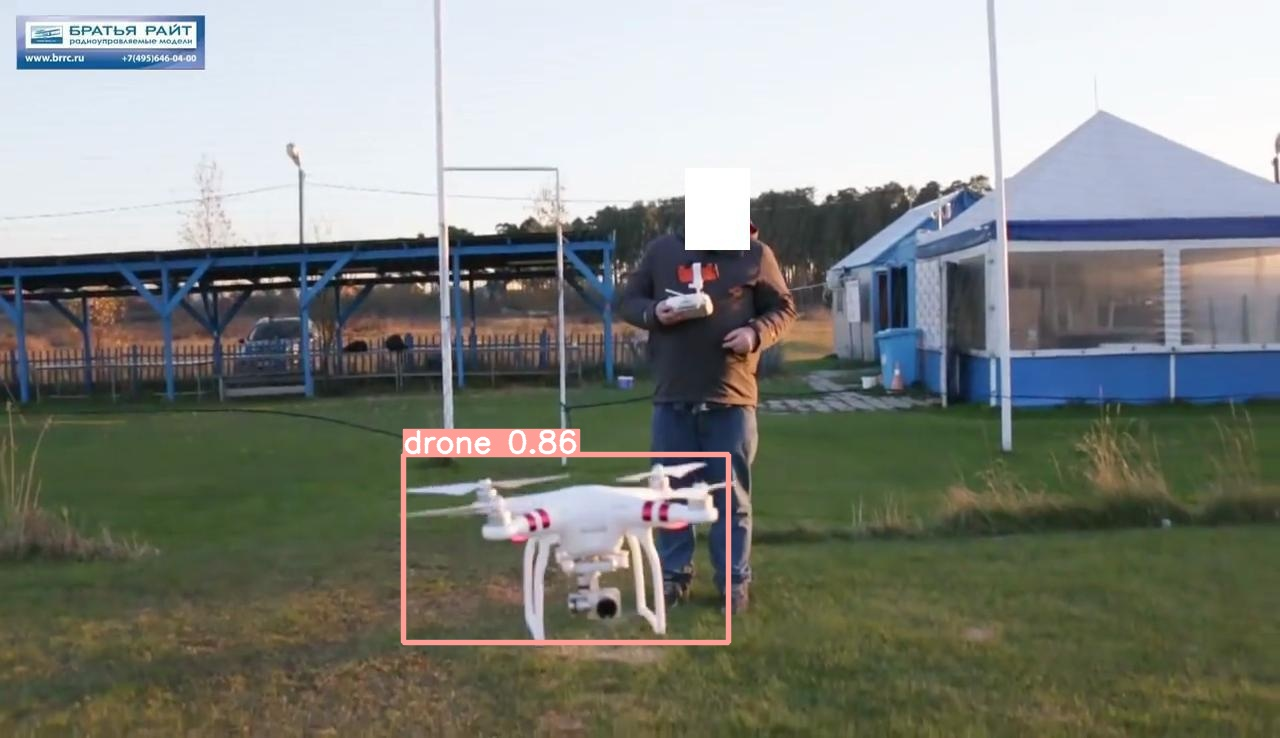

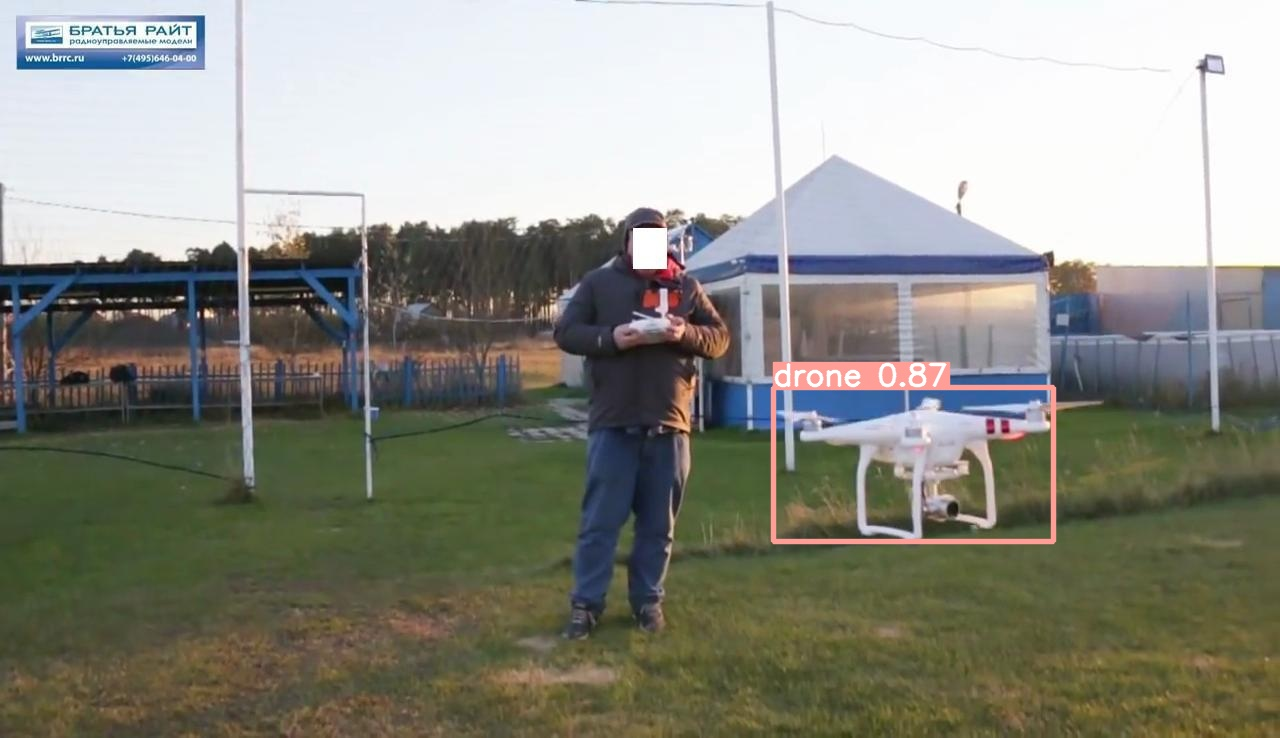

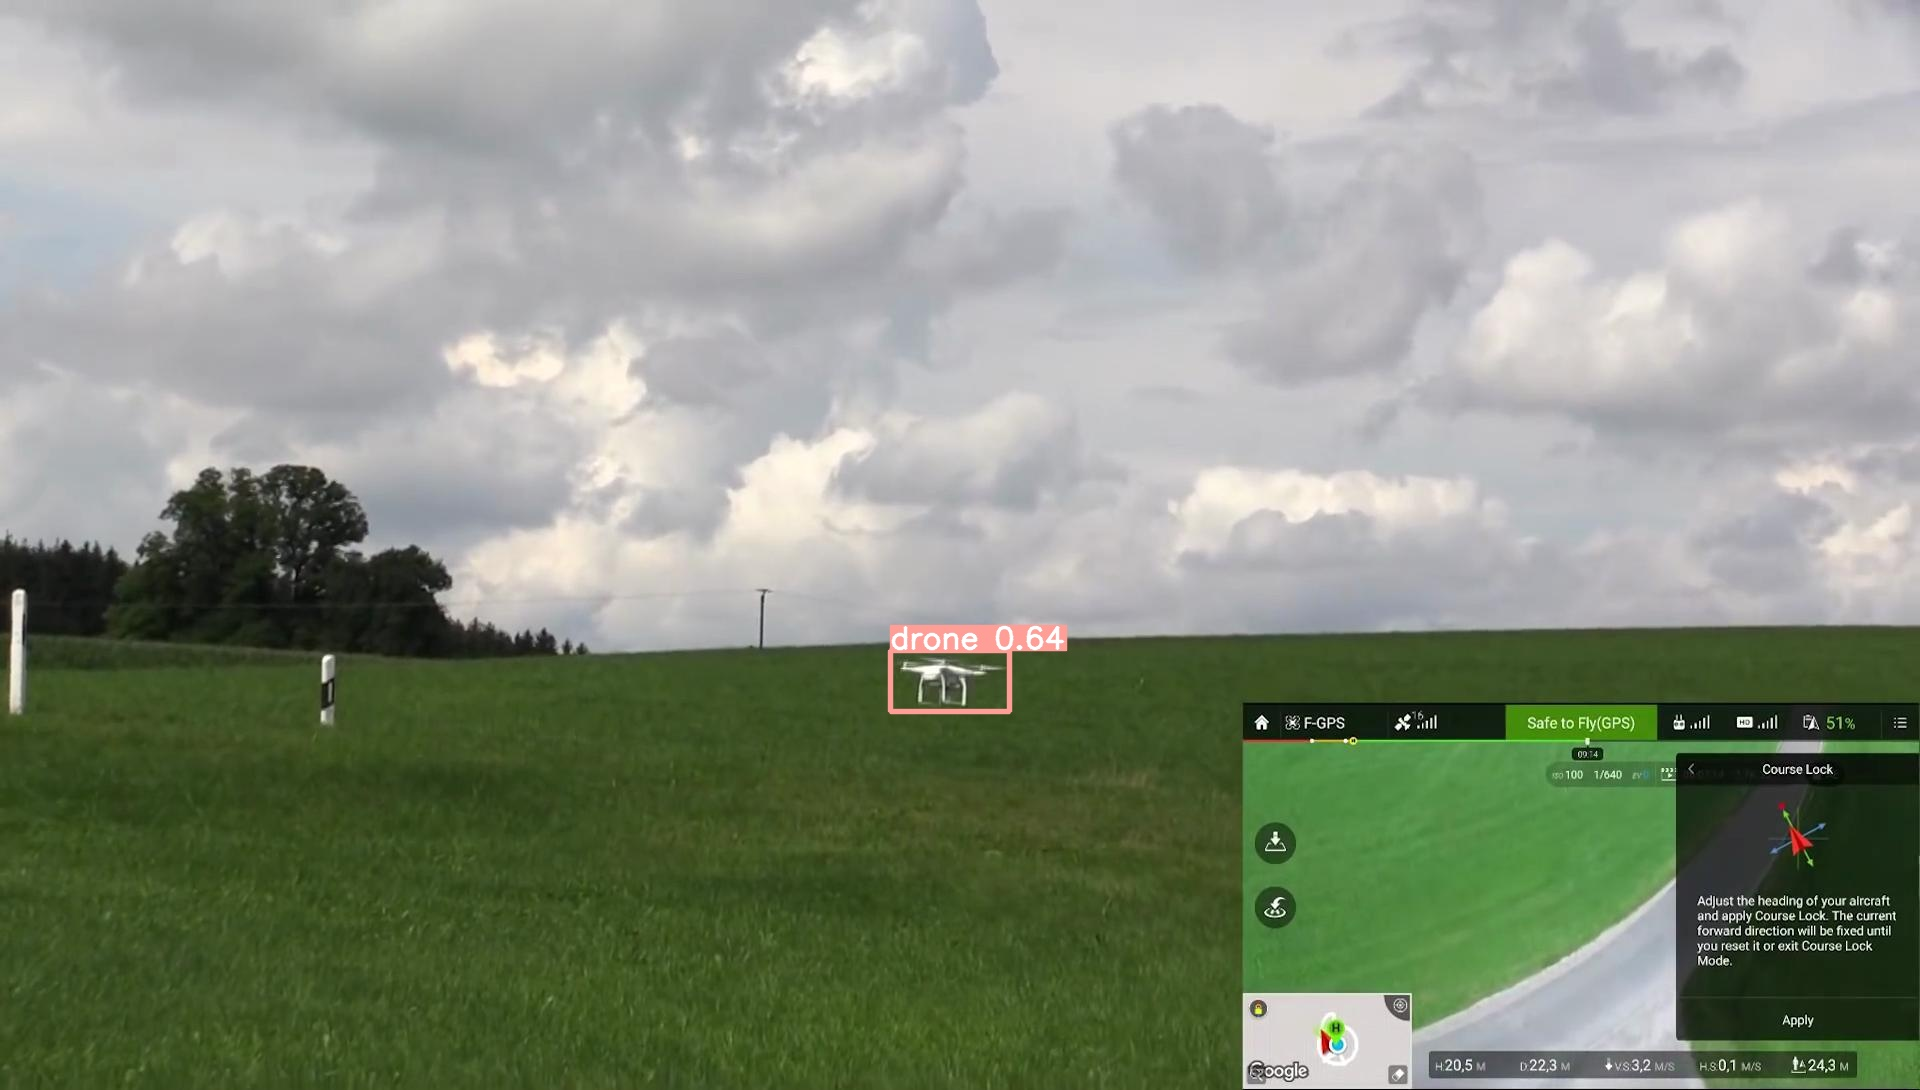

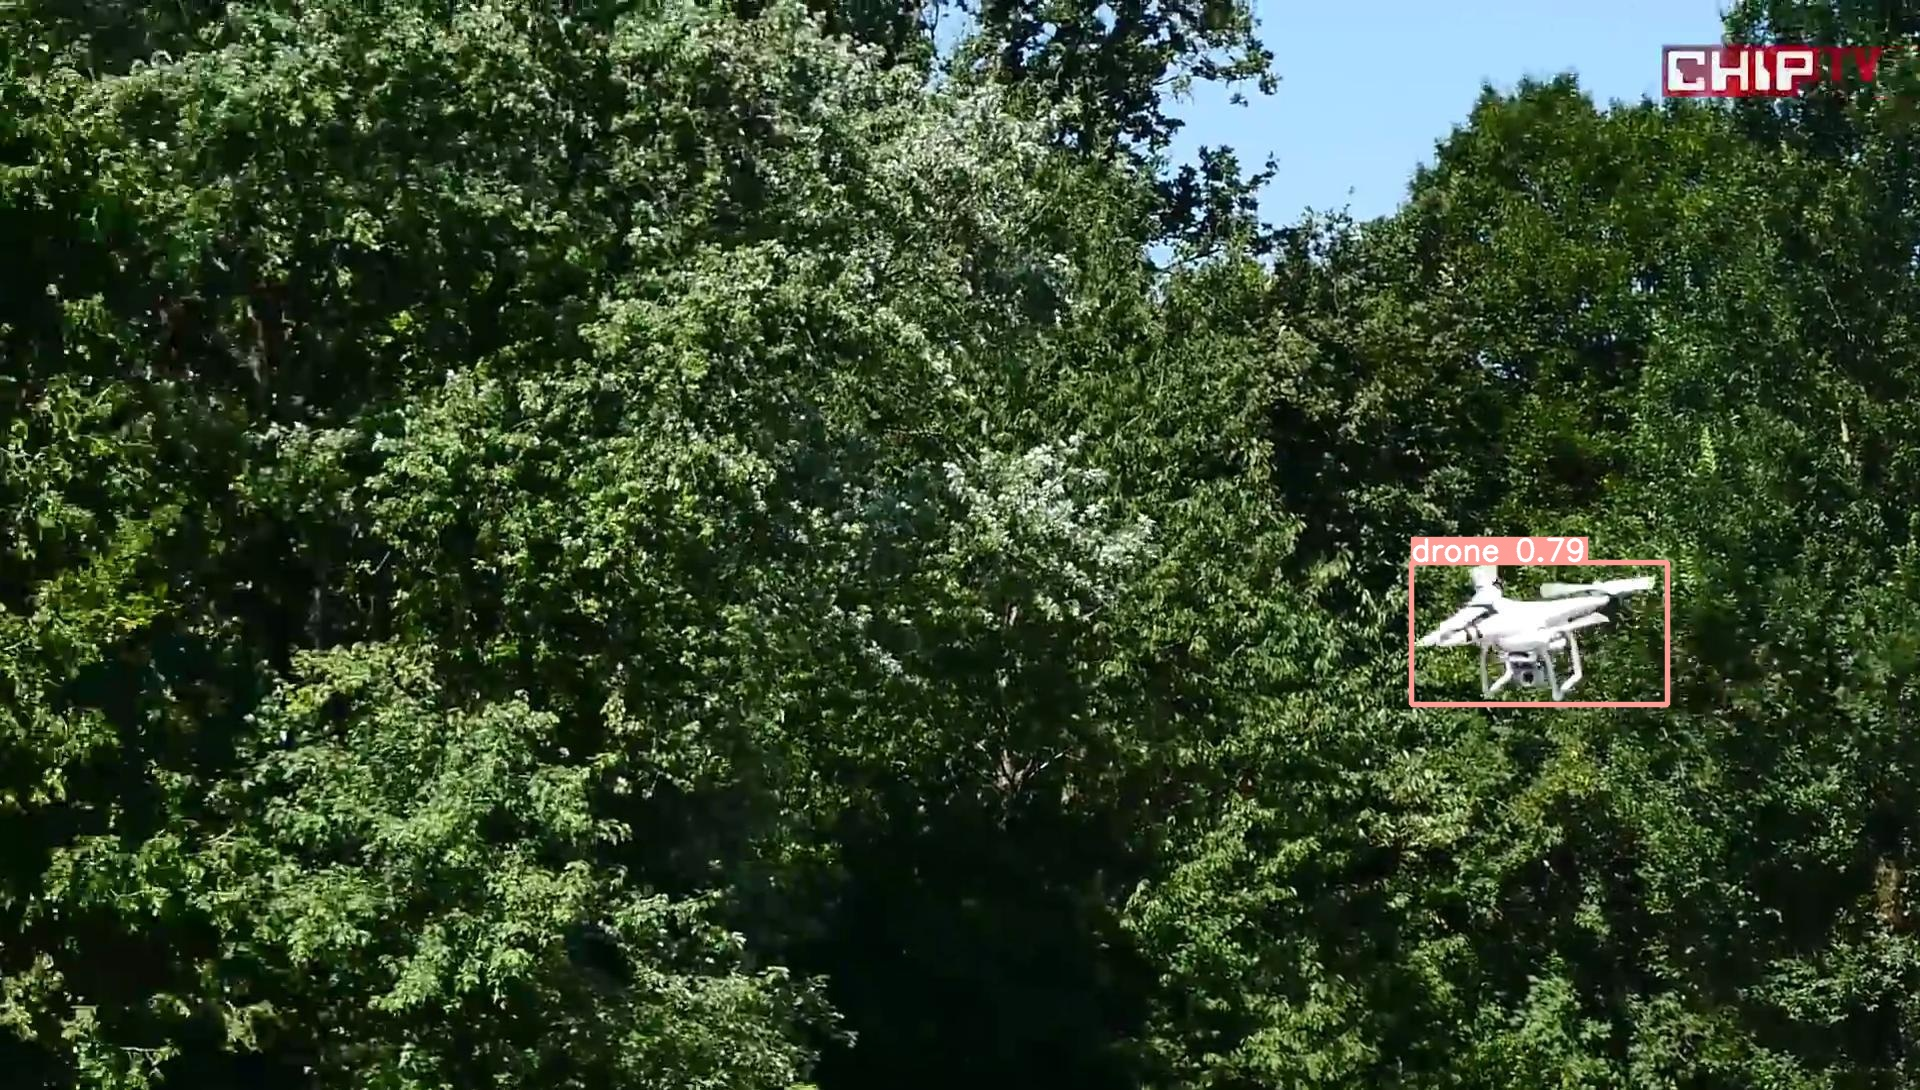

In [ ]:
#tested

display(Image("/content/runs/detect/predict/127_JPEG.rf.f7e5ca950f248b83d524a0b68b92cbc3.jpg", width=1000, height=600))
display(Image("/content/runs/detect/predict/130_JPEG.rf.108eca023389e6bff068ccd7d60d640e.jpg", width=1000, height=600))
display(Image("/content/runs/detect/predict/141_JPEG.rf.cf5570ac7c6d60c00c64121e80ded092.jpg", width=1000, height=600))
display(Image("/content/runs/detect/predict/144_JPEG.rf.a78f0e59cda979f6ecd748f96a15ec59.jpg", width=1000, height=600))
display(Image("/content/runs/detect/predict/159_JPEG.rf.0588928db2a55d73dcd617b846df5b82.jpg", width=1000, height=600))
display(Image("/content/runs/detect/predict/163_JPEG.rf.b63c10037db296c077ac8bd9ca856f01.jpg", width=1000, height=600))

# **6. Inference on Video**



## 6.1 Enter Video Path

In [ ]:
video_path = "/content/drive/MyDrive/DataSet/DroneX/Drones-UAV/DroneAmry.mp4"

In [ ]:
pwd

'/content/drive'

## 6.2 YOLOv8 Inference on Video


In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)

  # call our darknet helper on webcam image
  detections, width_ratio, height_ratio = darknet_helper(img, width, height)

  # loop through detections and draw them on webcam image
  for label, confidence, bbox in detections:
    left, top, right, bottom = bbox2points(bbox)
    left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    cv2.rectangle(img, (left, top), (right, bottom), class_colors[label], 2)
    cv2.putText(img, "{} [{:.2f}]".format(label, float(confidence)),
                      (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                      class_colors[label], 2)
  # save image
  cv2.imwrite(filename, img)

  return filename

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

name 'js_to_image' is not defined


In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data